In [3]:
# install ktrain
!python -m pip install ktrain

  Using cached ktrain-0.26.2.tar.gz (25.3 MB)
  Using cached fastprogress-1.0.0-py3-none-any.whl (12 kB)
  Using cached langdetect-1.0.8.tar.gz (981 kB)
  Using cached jieba-0.42.1.tar.gz (19.2 MB)
     |████████████████████████████████| 124 kB 1.8 MB/s eta 0:00:01
  Using cached syntok-1.3.1.tar.gz (23 kB)
  Using cached seqeval-0.0.19.tar.gz (30 kB)
  Using cached keras-bert-0.86.0.tar.gz (26 kB)
  Using cached Whoosh-2.7.4-py2.py3-none-any.whl (468 kB)
  Using cached keras-transformer-0.38.0.tar.gz (11 kB)
  Using cached keras-pos-embd-0.11.0.tar.gz (5.9 kB)
  Using cached keras-multi-head-0.27.0.tar.gz (14 kB)


  Using cached keras-layer-normalization-0.14.0.tar.gz (4.3 kB)
  Using cached keras-position-wise-feed-forward-0.6.0.tar.gz (4.4 kB)
  Using cached keras-embed-sim-0.8.0.tar.gz (4.1 kB)
  Using cached keras-self-attention-0.46.0.tar.gz (10 kB)
  Created wheel for ktrain: filename=ktrain-0.26.2-py3-none-any.whl size=25277795 sha256=c39c625aed0d17af0c43ce91cf28316d480399a501ac020cc32558b81da9c2e7
  Stored in directory: /Users/anjaneyatripathi/Library/Caches/pip/wheels/4c/f7/35/131e358c44b65fe37ad182ee43b326988339603c7f7b0ebabe
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-any.whl size=993191 sha256=79196a4e285a8efa6ec7f3abb13b09fca2520add9ee1b920f51fdc7f9f85e3fc
  Stored in directory: /Users/anjaneyatripathi/Library/Caches/pip/wheels/1e/80/23/0a24928ec3a3906ff5027f38d2fea824e7e97f2ba7c83d91e3
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314478 sha256=a81a7d1352fdec78ea13dd0a1d5cedd3f563d2fd52b68fb7bdcfc175c2b9bf71
  Stored in directory: /

In [4]:
# import ktrain
import ktrain
from ktrain import text

In [15]:
trn, val, preproc = text.texts_from_folder('../data', 
                                          maxlen=200, 
                                           lang='en',
                                          preprocess_mode='bert',
                                          train_test_names=['train', 
                                                            'test'],
                                          classes=['Insider Trading', 'Misappropriated Funds', 'Unregistered', 'Fraud'])

detected encoding: utf-8
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [16]:
model = text.text_classifier('bert', trn, preproc=preproc)
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

Is Multi-Label? False
maxlen is 200
done.


In [ ]:
learner.autofit(9e-3, 5)

In [18]:
learner.lr_find(max_epochs = 5)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
7/7 [==============================] - 47s 7s/step - loss: 1.8393 - accuracy: 0.2500
Epoch 2/5
7/7 [==============================] - 61s 9s/step - loss: 1.7980 - accuracy: 0.2500
Epoch 3/5
7/7 [==============================] - 49s 7s/step - loss: 1.6292 - accuracy: 0.2000
Epoch 4/5
7/7 [==============================] - 48s 7s/step - loss: 8.0469 - accuracy: 0.1750
Epoch 5/5
7/7 [==============================] - 48s 7s/step - loss: 123.1806 - accuracy: 0.1250


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


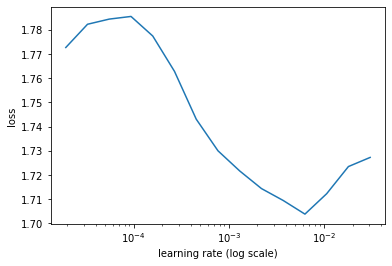

In [19]:
learner.lr_plot()